In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     id        topic sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  

Dataset shape: (69108, 4)


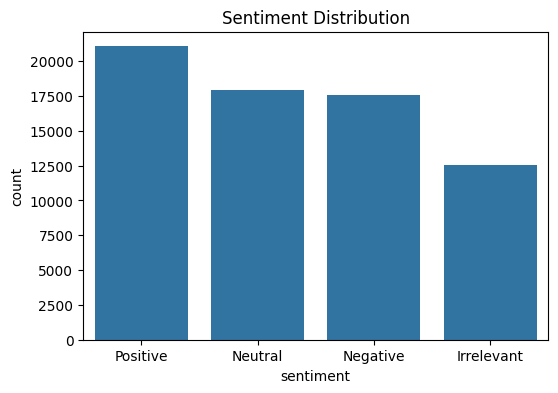


Accuracy: 0.7673274489943568

Confusion Matrix:
 [[1639  228  302  340]
 [ 116 2756  356  290]
 [ 140  300 2778  363]
 [ 183  224  374 3433]]

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.79      0.65      0.71      2509
    Negative       0.79      0.78      0.78      3518
     Neutral       0.73      0.78      0.75      3581
    Positive       0.78      0.81      0.79      4214

    accuracy                           0.77     13822
   macro avg       0.77      0.76      0.76     13822
weighted avg       0.77      0.77      0.77     13822



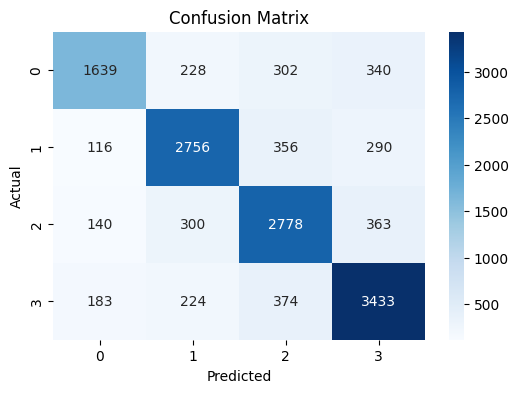

In [5]:
# Task-04: Sentiment Analysis on Social Media Data (CSV FIXED)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nltk.download('stopwords')
from nltk.corpus import stopwords

# -----------------------------
# 1. Load Dataset (PARSER FIX)
# -----------------------------
data = pd.read_csv(
    "/content/twitter_training.csv",
    header=None,
    engine="python",
    encoding="utf-8",
    on_bad_lines='skip'
)

data.columns = ['id', 'topic', 'sentiment', 'text']

# Remove missing rows
data.dropna(inplace=True)

print(data.head())
print("\nDataset shape:", data.shape)

# -----------------------------
# 2. Data Cleaning
# -----------------------------
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

data['clean_text'] = data['text'].apply(clean_text)

stop_words = set(stopwords.words('english'))
data['clean_text'] = data['clean_text'].apply(
    lambda x: " ".join(word for word in x.split() if word not in stop_words)
)

# -----------------------------
# 3. Sentiment Distribution
# -----------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=data)
plt.title("Sentiment Distribution")
plt.show()

# -----------------------------
# 4. TF-IDF Features
# -----------------------------
X = data['clean_text']
y = data['sentiment']

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X)

# -----------------------------
# 5. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 6. Train Model
# -----------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# -----------------------------
# 7. Prediction & Evaluation
# -----------------------------
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# 8. Confusion Matrix Plot
# -----------------------------
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()